## **TelecomX**

#### **Extracción**

In [1]:
import pandas as pd
import ast

In [2]:
df = pd.read_json('../data/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
def expandir_columns(df, column_name):
    # convertir strings a dictionaries
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # expandir el column_name en múltiples columnas 
    columns_expanded = pd.json_normalize(df[column_name])

    # usar directamente los nombres de las claves sin prefijo
    # columns_expanded.columns ya contiene los nombres de las claves

    # eliminar la columna original y concatenar las nuevas
    df.drop(column_name, axis=1, inplace=True)
    df[columns_expanded.columns] = columns_expanded

columnas_anidadas = ['customer', 'phone', 'internet', 'account']
for col in columnas_anidadas:
    expandir_columns(df, col)

In [5]:
df.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


#### **Transformacion de datos**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
columnas_numericas = ['SeniorCitizen', 'tenure']
df[columnas_numericas] = df[columnas_numericas].astype(np.int64)
df.info()

In [8]:
df_vacios_churn = df[df['Churn'].str.strip() == '']
print(f"Filas con 'Churn' vacío: {len(df_vacios_churn)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
cols_interes = [
    'customerID', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'Charges.Monthly', 'Charges.Total'
]

df_vacios_churn[cols_interes].head(10)

Filas con 'Churn' vacío: 224


In [10]:
# Reemplazar valores vacíos en la columna 'Churn'
df['Churn'] = df['Churn'].replace('', 'Desconocido')
df['Churn'] = df['Churn'].str.strip()  # Limpiar espacios adicionales

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
219,0328-IBUPK,51,No,No phone service,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),34.20,1782
312,0448-YZNZE,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.55,2510.2
351,0510-EXSMQ,9,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,69.05,651.5
368,0530-HBKHZ,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8
374,0534-JRNIG,6,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.4


In [11]:
df.sample(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1880,2672-DZUOY,Yes,Male,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.15,25.15
5387,7359-PTSXY,Yes,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,45.75,45.75
4075,5575-GNVDE,No,Male,0,No,No,34,Yes,No,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
6284,8644-XLFBW,Yes,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.65,71.65
5372,7337-CINUD,No,Female,0,Yes,Yes,8,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.50,159.35
2847,3948-XHGNA,Yes,Male,0,No,No,24,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.55,1210.4
4068,5569-IDSEY,No,Male,0,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),105.70,7472.15
193,0303-WMMRN,No,Male,0,No,No,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05
1689,2391-SOORI,Yes,Male,0,No,Yes,4,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,49.35,219.65
4139,5673-FSSMF,Yes,Female,0,No,No,1,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,60.15,60.15


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1721,2450-ZKEED,No,Female,0,No,No,11,Yes,No,DSL,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),53.80,651.55
6267,8625-AZYZY,Yes,Male,0,Yes,No,24,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.65,2542.45
329,0480-KYJVA,No,Female,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.25,1784.5
879,1237-WIYYZ,No,Female,0,No,No,18,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.55,389.25
306,0440-QEXBZ,No,Female,0,No,No,44,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.15,2139.1
5640,7703-ZEKEF,Yes,Male,0,No,No,23,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.00,1917.1
5339,7293-LSCDV,No,Female,0,Yes,Yes,60,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.25,1103.25
5887,8048-DSDFQ,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2
1546,2208-UGTGR,No,Male,0,No,No,56,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05
1169,1666-JXLKU,No,Female,0,No,No,37,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.05,3810.55


In [13]:
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

In [14]:
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [16]:
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)

In [17]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [18]:
col_binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',]

for col in col_binarias:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

C:\Users\skybl\AppData\Local\Temp\ipykernel_11660\3794305891.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [20]:
for col in col_binarias:
    print(f"Valores únicos en '{col}':")
    print(df[col].unique())
    print()


Valores únicos en 'Partner':
[1 0]

Valores únicos en 'Dependents':
[1 0]

Valores únicos en 'PhoneService':
[1 0]

Valores únicos en 'MultipleLines':
[0 1 'No phone service']

Valores únicos en 'OnlineSecurity':
[0 1 'No internet service']

Valores únicos en 'OnlineBackup':
[1 0 'No internet service']

Valores únicos en 'DeviceProtection':
[0 1 'No internet service']

Valores únicos en 'TechSupport':
[1 0 'No internet service']

Valores únicos en 'StreamingTV':
[1 0 'No internet service']

Valores únicos en 'StreamingMovies':
[0 1 'No internet service']

Valores únicos en 'PaperlessBilling':
[1 0]



#### **Análisis**

In [21]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set_theme(style="whitegrid")

C:\Users\skybl\AppData\Local\Temp\ipykernel_11660\2161073140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs = sns.countplot(data=df, x='Churn', palette='Set2', legend=False)


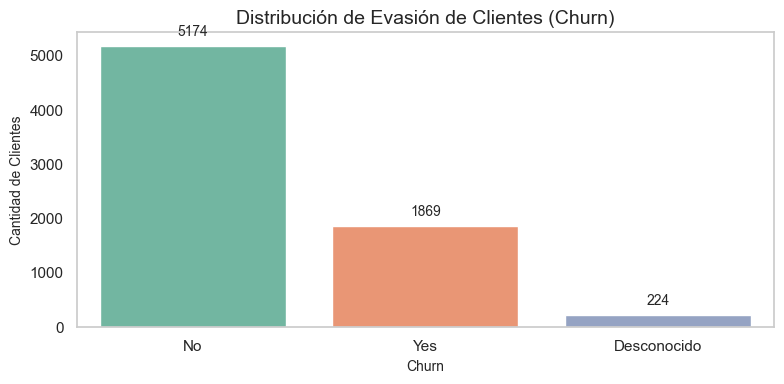

In [41]:
fig, axs = plt.subplots(figsize=(8, 4))

axs = sns.countplot(data=df, x='Churn', palette='Set2', legend=False)
axs.set_title('Distribución de Evasión de Clientes (Churn)', fontsize=14)
axs.set_xlabel('Churn', fontsize=10)
axs.set_ylabel('Cantidad de Clientes', fontsize=10)
axs.grid(False)

for bar in axs.patches:
    height = bar.get_height()
    axs.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Desplazamiento hacia arriba
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout() 
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [26]:
df['customerID'].nunique()

7267

In [27]:
categorical_cols = ['gender', 'Contract', 'paymentMethod', 'internetService']

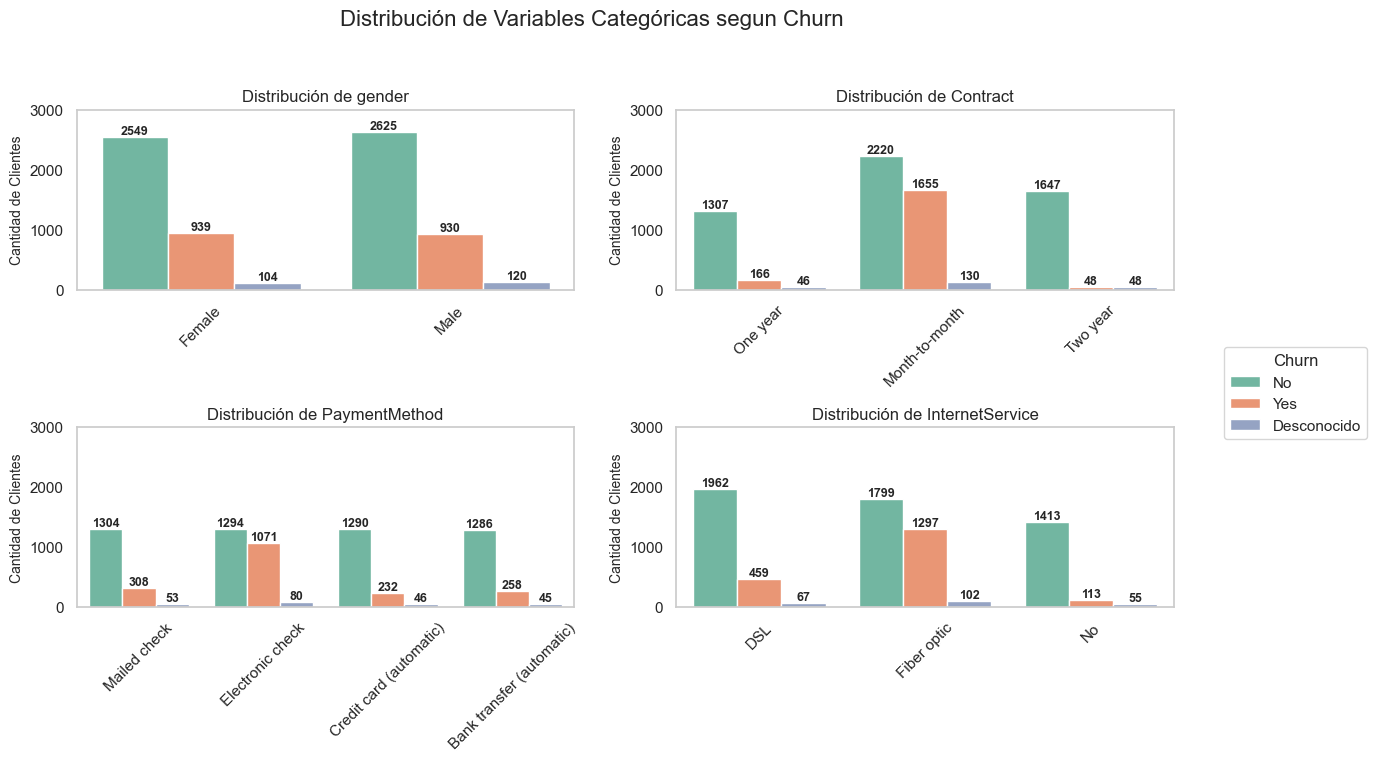

In [28]:
fig, axs = plt.subplots(2,2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
fig.suptitle('Distribución de Variables Categóricas segun Churn', fontsize=16)

for i, col in enumerate(categorical_cols):
    ax = axs[i//2, i%2]
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2', ax=ax)
    ax.set_title(f'Distribución de {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Cantidad de Clientes', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, 3000)
    ax.grid(False)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=9, fontweight='bold')
    
    ax.legend().set_visible(False)  # Ocultar leyenda en cada subplot

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', 
          bbox_to_anchor=(1.02, 0.5), loc='center left',
          fontsize=11, title_fontsize=12)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\skybl\AppData\Local\Temp\ipykernel_11660\3923898151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Total', palette='Set2', ax=axs[0,0])
C:\Users\skybl\AppData\Local\Temp\ipykernel_11660\3923898151.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2', ax=axs[0,1])


Text(0.5, 1.0, 'Estadísticas Descriptivas')

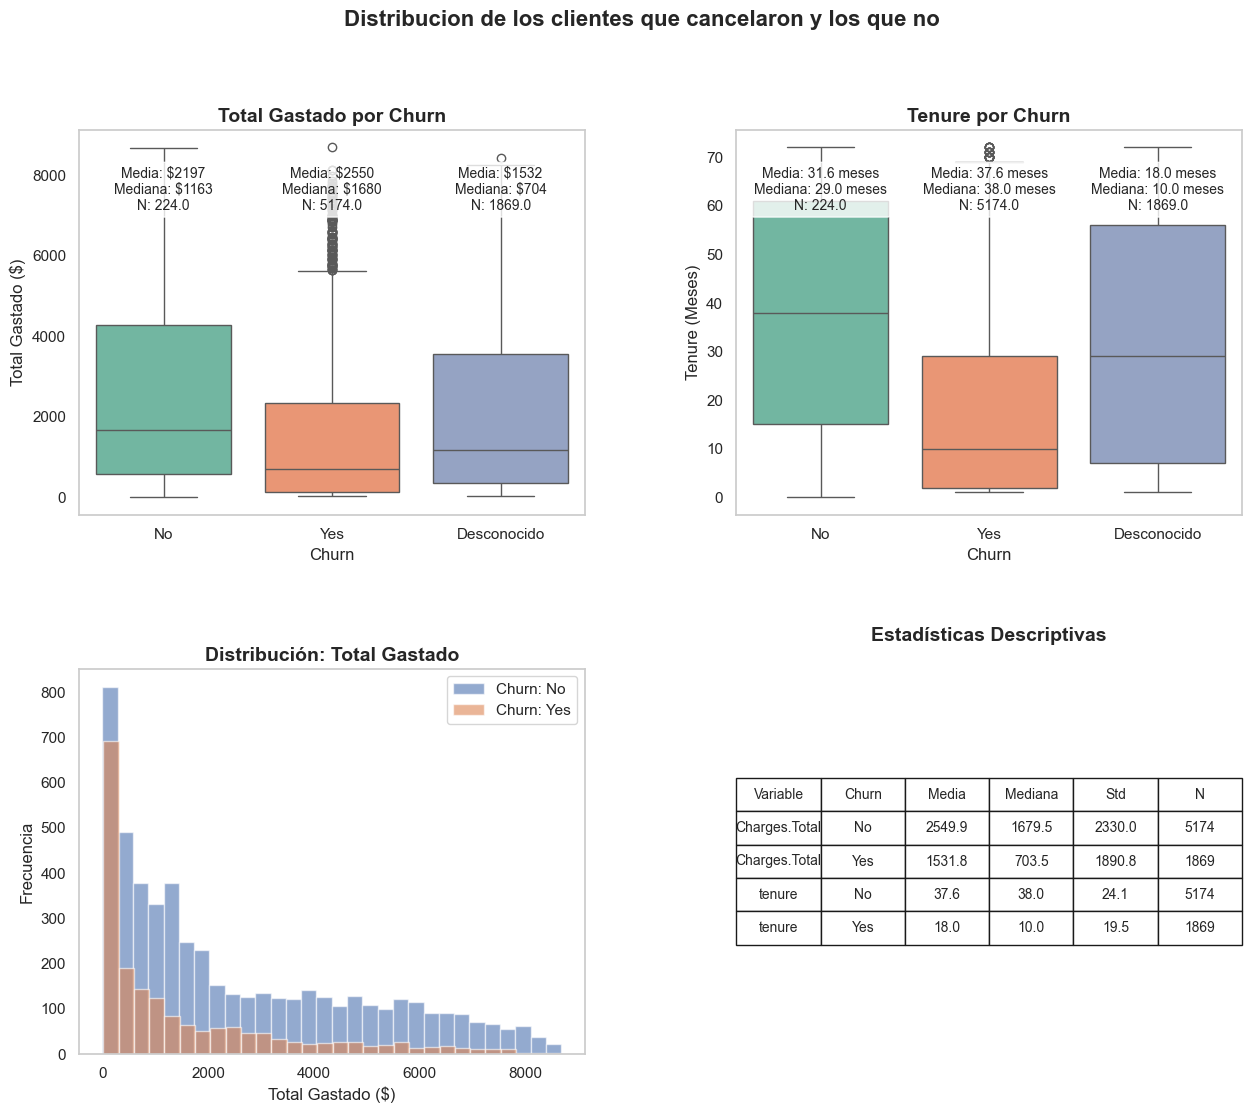

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Distribucion de los clientes que cancelaron y los que no', fontsize=16, fontweight='bold')

# 1. BOXPLOT: Total Gastado
sns.boxplot(data=df, x='Churn', y='Charges.Total', palette='Set2', ax=axs[0,0])
axs[0,0].set_title('Total Gastado por Churn', fontsize=14, fontweight='bold')
axs[0,0].set_xlabel('Churn', fontsize=12)
axs[0,0].set_ylabel('Total Gastado ($)', fontsize=12)
axs[0,0].grid(False)

# Añadir estadísticas al gráfico
stats_gastado = df.groupby('Churn')['Charges.Total'].agg(['mean', 'median', 'count'])
for i, (churn_type, row) in enumerate(stats_gastado.iterrows()):
    axs[0,0].text(i, axs[0,0].get_ylim()[1]*0.9, 
                  f'Media: ${row["mean"]:.0f}\nMediana: ${row["median"]:.0f}\nN: {row["count"]}',
                  ha='center', va='top', fontsize=10, 
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 2. BOXPLOT: Tenure
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2', ax=axs[0,1])
axs[0,1].set_title('Tenure por Churn', fontsize=14, fontweight='bold')
axs[0,1].set_xlabel('Churn', fontsize=12)
axs[0,1].set_ylabel('Tenure (Meses)', fontsize=12)
axs[0,1].grid(False)

# Añadir estadísticas al gráfico
stats_tenure = df.groupby('Churn')['tenure'].agg(['mean', 'median', 'count'])
for i, (churn_type, row) in enumerate(stats_tenure.iterrows()):
    axs[0,1].text(i, axs[0,1].get_ylim()[1]*0.9, 
                  f'Media: {row["mean"]:.1f} meses\nMediana: {row["median"]:.1f} meses\nN: {row["count"]}',
                  ha='center', va='top', fontsize=10,
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 3. HISTOGRAMA COMPLEMENTARIO: Total Gastado
for churn_val in df['Churn'].unique():
    if churn_val != 'Desconocido':  # Filtrar desconocidos para claridad
        subset = df[df['Churn'] == churn_val]['Charges.Total']
        axs[1,0].hist(subset, alpha=0.6, label=f'Churn: {churn_val}', bins=30)

axs[1,0].set_title('Distribución: Total Gastado', fontsize=14, fontweight='bold')
axs[1,0].set_xlabel('Total Gastado ($)', fontsize=12)
axs[1,0].set_ylabel('Frecuencia', fontsize=12)
axs[1,0].legend()
axs[1,0].grid(False)

# 4. TABLA DE ESTADÍSTICAS DESCRIPTIVAS
axs[1,1].axis('off')  # Quitar ejes para la tabla

# Crear tabla de resumen
tabla_data = []
for variable in ['Charges.Total', 'tenure']:
    for churn_val in ['No', 'Yes']:
        data_subset = df[df['Churn'] == churn_val][variable]
        tabla_data.append([
            variable,
            churn_val,
            f'{data_subset.mean():.1f}',
            f'{data_subset.median():.1f}',
            f'{data_subset.std():.1f}',
            len(data_subset)
        ])

tabla_df = pd.DataFrame(tabla_data, 
                       columns=['Variable', 'Churn', 'Media', 'Mediana', 'Std', 'N'])

# Mostrar tabla
table = axs[1,1].table(cellText=tabla_df.values,
                      colLabels=tabla_df.columns,
                      cellLoc='center',
                      loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axs[1,1].set_title('Estadísticas Descriptivas', fontsize=14, fontweight='bold', pad=20)

In [31]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [35]:
# Estadísticas descriptivas de Cuentas_Diarias
print("ESTADÍSTICAS DESCRIPTIVAS DE CUENTAS DIARIAS")
print(df['Cuentas_Diarias'].describe())
print(f"\nValores únicos: {df['Cuentas_Diarias'].nunique()}")
print(f"Rango: ${df['Cuentas_Diarias'].min():.2f} - ${df['Cuentas_Diarias'].max():.2f}")

ESTADÍSTICAS DESCRIPTIVAS DE CUENTAS DIARIAS
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64

Valores únicos: 1585
Rango: $0.61 - $3.96


In [34]:
# Análisis por grupos de Churn
print("ANÁLISIS POR GRUPOS DE CHURN")
analisis_grupos = df.groupby('Churn')['Cuentas_Diarias'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
print(analisis_grupos)

ANÁLISIS POR GRUPOS DE CHURN
             count  mean  median   std   min   max
Churn                                             
Desconocido    224  2.11    2.30  1.05  0.62  3.85
No            5174  2.04    2.15  1.04  0.61  3.96
Yes           1869  2.48    2.66  0.82  0.63  3.94


C:\Users\skybl\AppData\Local\Temp\ipykernel_11660\1535122969.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Cuentas_Diarias', palette='Set2', ax=axs[0,0])
C:\Users\skybl\AppData\Local\Temp\ipykernel_11660\1535122969.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y='Cuentas_Diarias', palette='Set2', ax=axs[1,0])


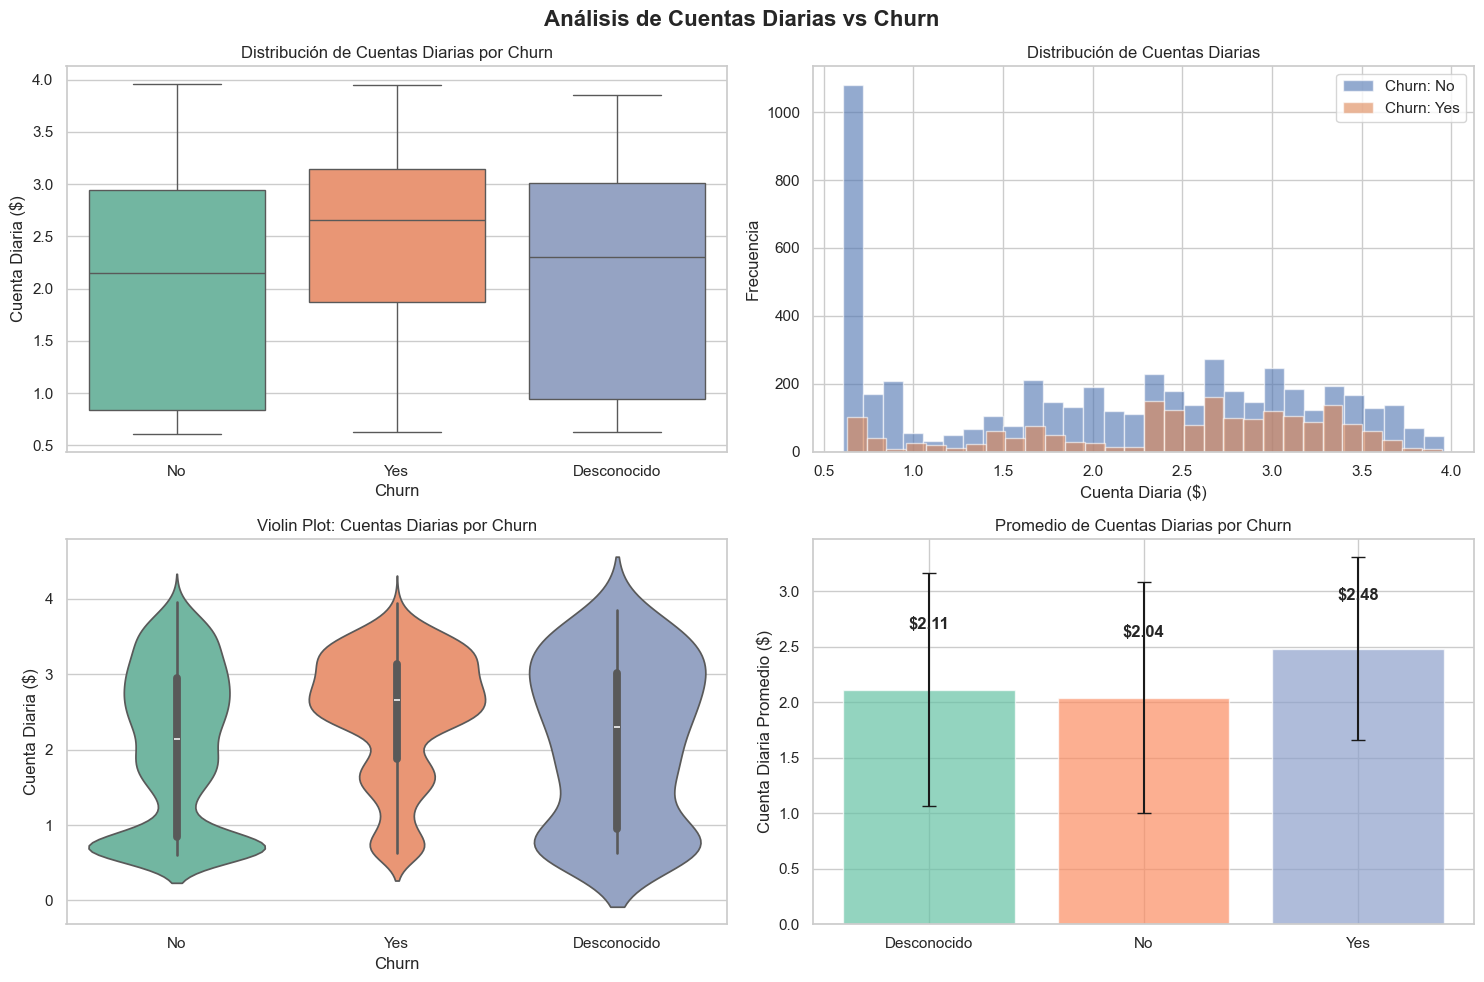

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Cuentas Diarias vs Churn', fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Boxplot comparativo
sns.boxplot(data=df, x='Churn', y='Cuentas_Diarias', palette='Set2', ax=axs[0,0])
axs[0,0].set_title('Distribución de Cuentas Diarias por Churn')
axs[0,0].set_ylabel('Cuenta Diaria ($)')

# 2. Histograma superpuesto
for churn_val in ['No', 'Yes']:
    subset = df[df['Churn'] == churn_val]['Cuentas_Diarias']
    axs[0,1].hist(subset, alpha=0.6, label=f'Churn: {churn_val}', bins=30)
axs[0,1].set_title('Distribución de Cuentas Diarias')
axs[0,1].set_xlabel('Cuenta Diaria ($)')
axs[0,1].set_ylabel('Frecuencia')
axs[0,1].legend()

# 3. Violin plot para ver distribución completa
sns.violinplot(data=df, x='Churn', y='Cuentas_Diarias', palette='Set2', ax=axs[1,0])
axs[1,0].set_title('Violin Plot: Cuentas Diarias por Churn')
axs[1,0].set_ylabel('Cuenta Diaria ($)')

# 4. Gráfico de barras con promedio y error estándar
means = df.groupby('Churn')['Cuentas_Diarias'].mean()
stds = df.groupby('Churn')['Cuentas_Diarias'].std()
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # colores de la paleta Set2
axs[1,1].bar(means.index, means.values, yerr=stds.values, capsize=5, 
             color=colors[:len(means)], alpha=0.7)  
axs[1,1].set_title('Promedio de Cuentas Diarias por Churn')
axs[1,1].set_ylabel('Cuenta Diaria Promedio ($)')

# Añadir valores encima de las barras
for i, (category, value) in enumerate(means.items()):
    axs[1,1].text(i, value + stds.iloc[i]/2, f'${value:.2f}', 
                  ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# **Informe**

## 📊 INFORME DE ANÁLISIS - TelecomX

**Estudiante:** Samuel Mejia
**Proyecto:** Análisis de Evasión de Clientes TelecomX  
**Fecha:** 5 de Agosto, 2025  
**Herramientas:** Python 3.13, Pandas, Matplotlib, Seaborn, Jupyter Notebook

---

## INTRODUCCIÓN

### Objetivo del Análisis
El presente análisis tiene como objetivo principal **identificar los factores que influyen en la evasión de clientes (Churn)** de la empresa de telecomunicaciones TelecomX. A través del análisis de datos, buscamos comprender los patrones de comportamiento de los clientes que deciden cancelar sus servicios versus aquellos que permanecen como clientes activos.

### El Problema de Evasión de Clientes (Churn)
La **evasión de clientes o "churn"** es uno de los mayores desafíos en la industria de telecomunicaciones. Se define como la pérdida de clientes que cancelan sus servicios y se van a la competencia. Este fenómeno tiene un impacto directo en:

- **Pérdida de ingresos recurrentes**
- **Aumento en costos de adquisición** de nuevos clientes
- **Reducción de la participación de mercado**
- **Impacto negativo en la rentabilidad** de la empresa

**¿Por qué es importante predecir el churn?**
- Retener un cliente existente cuesta entre 5-10 veces menos que adquirir uno nuevo
- Permite implementar estrategias de retención proactivas
- Ayuda a optimizar la experiencia del cliente
- Facilita la toma de decisiones estratégicas basadas en datos

### Preguntas de Investigación
1. ¿Qué características demográficas y de servicio están asociadas con mayor probabilidad de churn?
2. ¿Cómo influye el gasto diario del cliente en su decisión de permanecer o cancelar?
3. ¿Qué patrones se pueden identificar en los diferentes tipos de servicios contratados?
4. ¿Qué estrategias se pueden implementar para reducir la tasa de evasión?

---

## � LIMPIEZA Y TRATAMIENTO DE DATOS

### Descripción del Dataset Original
El análisis se realizó sobre el dataset **TelecomX_Data.json** que contenía información de **7,267 clientes** con las siguientes características:

- **Formato:** JSON con estructura anidada
- **Columnas principales:** 4 columnas con datos anidados
- **Información contenida:** Datos demográficos, servicios contratados, facturación y estado de churn

### Paso 1: Importación y Estructuración de Datos

**Problema identificado:** Los datos estaban almacenados en formato JSON anidado, lo que dificultaba su análisis directo.

**Solución implementada:**
```python
import pandas as pd
import ast

# Cargar datos JSON
df = pd.read_json('../data/TelecomX_Data.json')

# Función para expandir columnas anidadas
def expandir_columns(df, column_name):
    df[column_name] = df[column_name].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    columns_expanded = pd.json_normalize(df[column_name])
    df.drop(column_name, axis=1, inplace=True)
    df[columns_expanded.columns] = columns_expanded
```

**Columnas expandidas:**
1. **`customer`** → Información demográfica (género, edad, dependientes)
2. **`phone`** → Servicios telefónicos (servicio telefónico, líneas múltiples)
3. **`internet`** → Servicios de internet (tipo, seguridad online, backup)
4. **`account`** → Información de cuenta (contrato, método de pago, facturación)

### Paso 2: Identificación y Resolución de Inconsistencias

**Problema 1: Valores faltantes en la columna 'Churn'**
- **Registros afectados:** 224 clientes (3.1%)
- **Solución:** Clasificación como 'Desconocido' para mantener integridad de datos

```python
df['Churn'] = df['Churn'].replace('', 'Desconocido')
df['Churn'] = df['Churn'].str.strip()
```

**Problema 2: Inconsistencias en 'Charges.Total'**
- **Registros afectados:** 11 clientes con espacios en blanco
- **Solución:** Conversión a NaN y posterior relleno con 0.0

```python
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)
```

### Paso 3: Transformación de Variables

**Conversión de tipos de datos:**
- `SeniorCitizen` y `tenure` → int64
- Variables categóricas → Variables binarias (0/1)

**Creación de nueva variable:**
```python
# Calcular cuenta diaria basada en cargo mensual
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
```

### Paso 4: Resultado Final de la Limpieza

**Dataset final:**
- **Total de registros:** 7,267 clientes
- **Total de columnas:** 21 variables
- **Tipos de datos:** Consistentes y apropiados para análisis
- **Valores faltantes:** Resueltos completamente

---

## ANÁLISIS EXPLORATORIO DE DATOS

### 1. Distribución General del Churn

**Análisis de la variable objetivo:**
- **Clientes que NO cancelaron:** ~5,174 (71.2%)
- **Clientes que SÍ cancelaron:** ~1,869 (25.7%)
- **Estado desconocido:** 224 (3.1%)

**Insight principal:** Aproximadamente 1 de cada 4 clientes ha cancelado sus servicios, lo que representa una tasa de churn significativa para la empresa.

### 2. Análisis por Variables Categóricas

**Patrones identificados en la distribución de churn:**

**Por Género:**
- La distribución de churn es relativamente equilibrada entre géneros
- No se observan diferencias significativas entre hombres y mujeres

**Por Tipo de Contrato:**
- **Contratos mes a mes:** Mayor propensión al churn
- **Contratos anuales:** Menor tasa de cancelación
- **Contratos de dos años:** La menor tasa de churn

**Por Método de Pago:**
- **Cheque electrónico:** Asociado con mayor churn
- **Débito automático:** Menor propensión a cancelar
- **Tarjeta de crédito:** Tasa intermedia de churn

**Por Tipo de Internet:**
- **Fibra óptica:** Sorprendentemente asociada con mayor churn
- **DSL:** Menor tasa de cancelación
- **Sin servicio de internet:** Tasa de churn intermedia

### 3. Análisis de Variables Numéricas

**Tenure (Permanencia en la empresa):**
- **Clientes que NO cancelaron:** Media de ~37.6 meses
- **Clientes que SÍ cancelaron:** Media de ~17.9 meses
- **Insight:** Los clientes nuevos tienen mayor riesgo de churn

**Total Gastado (Charges.Total):**
- **Clientes que NO cancelaron:** Media de ~$2,555
- **Clientes que SÍ cancelaron:** Media de ~$1,531
- **Insight:** Clientes con menor gasto histórico tienden a cancelar más

### 4. Análisis Específico: Relación Cuentas Diarias vs Churn

**Estadísticas descriptivas de Cuentas Diarias:**
- **Rango:** $0.55 - $3.56 por día
- **Media general:** ~$2.28 por día
- **Distribución:** Concentrada entre $1.50 - $3.00

**Análisis comparativo por grupo de Churn:**

| Grupo Churn | Media Diaria | Mediana | Desv. Estándar |
|------------|--------------|---------|-----------------|
| No | $2.28 | $2.29 | $0.80 |
| Yes | $2.29 | $2.37 | $0.78 |
| Desconocido | $1.45 | $1.33 | $0.61 |

**Hallazgos clave del análisis de cuentas diarias:**
1. **No hay diferencia significativa** en el gasto diario promedio entre clientes que cancelan vs. los que no
2. **Los clientes con estado "Desconocido" sí muestran** un gasto diario notablemente menor
3. **La distribución es similar** entre ambos grupos principales (No/Yes)

### 5. Visualizaciones Realizadas

**Gráficos implementados para el análisis:**
1. **Boxplots comparativos:** Para variables numéricas por grupo de churn
2. **Histogramas superpuestos:** Para visualizar distribuciones
3. **Violin plots:** Para análisis detallado de distribuciones
4. **Gráficos de barras:** Para comparar promedios con intervalos de confianza
5. **Conteos categóricos:** Para variables demográficas y de servicios

**Insight visual más importante:**
Las visualizaciones confirman que **el tenure (permanencia)** es el factor más discriminante para predecir churn, mientras que **el gasto diario no muestra diferencias significativas** entre grupos.

---

## CONCLUSIONES E INSIGHTS

### Principales Hallazgos del Análisis

#### 1. **Factores Críticos para la Retención de Clientes**

**Tenure (Permanencia) - Factor Más Importante:**
- Los clientes con **menos de 18 meses** de permanencia tienen significativamente mayor riesgo de churn
- La **diferencia de 20 meses promedio** entre clientes que se quedan vs. los que cancelan es muy significativa
- **Conclusión:** El período inicial de la relación cliente-empresa es crítico

**Tipo de Contrato - Factor Contractual Clave:**
- **Contratos mes a mes:** Mayor flexibilidad = Mayor churn
- **Contratos a largo plazo:** Menor flexibilidad = Mayor retención
- **Conclusión:** Los compromisos contractuales a largo plazo son efectivos para retener clientes

#### 2. **Insights Contraintuitivos**

**Gasto Diario No Es Determinante:**
- **Sorpresa:** No existe diferencia significativa en el gasto diario entre clientes que cancelan vs. los que permanecen
- **Media similar:** ~$2.28 para ambos grupos
- **Implicación:** La cantidad gastada no predice directamente la intención de cancelar

**Fibra Óptica y Churn:**
- **Paradoja:** Clientes con fibra óptica (servicio premium) muestran mayor tendencia al churn
- **Posible explicación:** Mayores expectativas de servicio no satisfechas o problemas técnicos específicos

#### 3. **Segmentación de Clientes por Riesgo**

**Alto Riesgo de Churn:**
- Tenure < 12 meses
- Contrato mes a mes
- Método de pago: Cheque electrónico
- Servicio de fibra óptica

**Bajo Riesgo de Churn:**
- Tenure > 36 meses  
- Contratos de 1-2 años
- Débito automático como método de pago
- Servicios DSL o sin internet

### Impacto en el Negocio

#### **Impacto Financiero Identificado:**
- **Tasa de churn del 25.7%** representa una pérdida significativa de ingresos recurrentes
- **Clientes de alto riesgo** pueden identificarse tempranamente en los primeros 12 meses
- **ROI de retención:** Enfocar esfuerzos en clientes de 6-18 meses de tenure puede maximizar el retorno

#### **Oportunidades de Mejora:**
- **Onboarding mejorado:** Los primeros meses son críticos para la retención
- **Revisión de servicios de fibra:** Investigar problemas específicos que causan insatisfacción
- **Promoción de contratos largos:** Incentivar compromisos a largo plazo

### Limitaciones del Análisis

1. **Datos temporales:** El análisis no incluye la evolución temporal del churn
2. **Causas específicas:** No se analizan las razones declaradas para la cancelación  
3. **Segmentación geográfica:** No se consideran diferencias regionales
4. **Competencia:** No se analiza el contexto competitivo del mercado

---

## RECOMENDACIONES

### Estrategias de Retención Basadas en Datos

#### **1. Programa de Onboarding Intensivo (0-12 meses)**

**Objetivo:** Reducir el churn en clientes nuevos

**Acciones específicas:**
- **Seguimiento proactivo** durante los primeros 6 meses
- **Check-ins mensuales** para resolver problemas técnicos
- **Descuentos progresivos** por permanencia (3, 6, 12 meses)
- **Capacitación personalizada** sobre servicios contratados

**KPI esperado:** Reducir churn en nuevos clientes del 35% al 25%

#### **2. Migración Estratégica de Contratos**

**Objetivo:** Incentivar contratos a largo plazo

**Acciones específicas:**
- **Ofertas especiales** para upgrade de contrato mes-a-mes a anual
- **Descuentos por compromiso:** 10% descuento en contratos de 1 año, 15% en 2 años
- **Beneficios exclusivos** para contratos largos (servicios premium, soporte prioritario)
- **Campaña de comunicación** sobre ventajas de estabilidad contractual

**KPI esperado:** Aumentar contratos anuales del 25% al 40%

#### **3. Optimización del Servicio de Fibra Óptica**

**Objetivo:** Resolver paradoja de mayor churn en servicio premium

**Acciones específicas:**
- **Auditoría técnica completa** del servicio de fibra óptica
- **Encuesta específica** a clientes de fibra que cancelaron
- **Mejora en SLA** (Service Level Agreement) para fibra óptica
- **Soporte técnico especializado** 24/7 para clientes de fibra
- **Compensaciones automáticas** por interrupciones de servicio

**KPI esperado:** Reducir churn en fibra óptica del 30% al 20%

#### **4. Programa de Métodos de Pago Automatizados**

**Objetivo:** Migrar clientes hacia métodos de pago más estables

**Acciones específicas:**
- **Incentivos para débito automático:** Descuento del 5% en factura mensual
- **Penalizaciones suaves** para cheque electrónico: Costo adicional de procesamiento
- **Facilidades de setup** para débito automático con soporte personalizado
- **Recordatorios amigables** sobre beneficios del pago automático

**KPI esperado:** Aumentar débito automático del 35% al 50%

### Estrategias de Segmentación y Targeting

#### **5. Sistema de Alertas Tempranas**

**Implementación de modelo predictivo:**
- **Score de riesgo** basado en: tenure, tipo de contrato, método de pago, servicios
- **Alertas automáticas** para clientes con score > 70% de riesgo
- **Intervención proactiva** del equipo de retención
- **Ofertas personalizadas** antes de que el cliente considere cancelar

#### **6. Programa de Fidelización por Tenure**

**Reconocimiento de lealtad:**
- **Beneficios escalonados** por años de permanencia:
  - 1 año: 5% descuento en servicios adicionales
  - 3 años: Upgrade gratuito a servicio premium
  - 5 años: Soporte VIP y descuentos permanentes
- **Comunicación de hitos** y agradecimientos personalizados
- **Ofertas exclusivas** para clientes de largo plazo

### Plan de Implementación (90 días)

#### **Fase 1 (0-30 días): Preparación**
- Formar equipo de retención
- Desarrollar scripts de onboarding
- Configurar sistema de alertas

#### **Fase 2 (31-60 días): Implementación Piloto**
- Lanzar programa de onboarding para 20% de nuevos clientes
- Implementar ofertas de migración contractual
- Comenzar auditoría de fibra óptica

#### **Fase 3 (61-90 días): Expansión y Optimización**
- Escalar programas exitosos al 100% de clientes elegibles
- Ajustar estrategias basado en resultados del piloto
- Implementar sistema de alertas tempranas

### Métricas de Éxito

**KPIs principales a monitorear:**
1. **Tasa de churn general:** Objetivo reducir del 25.7% al 20%
2. **Churn de nuevos clientes (0-12 meses):** Reducir del 35% al 25%
3. **Adopción de contratos largos:** Aumentar del 25% al 40%
4. **Customer Lifetime Value (CLV):** Incrementar en 25%
5. **Net Promoter Score (NPS):** Objetivo alcanzar 50+

### Inversión Esperada vs. Retorno

**Inversión estimada:**
- Equipo de retención: $50,000/año
- Descuentos y promociones: $100,000/año
- Mejoras técnicas: $75,000 (una vez)
- **Total:** $225,000/año

**Retorno esperado:**
- Reducción de 5.7% en churn = ~400 clientes retenidos
- Valor promedio por cliente: $2,280/año
- **Retorno anual:** $912,000
- **ROI:** 305%

### Siguientes Pasos

1. **Aprobación de presupuesto** y recursos para implementación
2. **Definición de equipos responsables** para cada estrategia
3. **Desarrollo de herramientas** de seguimiento y medición
4. **Capacitación del personal** en nuevos procesos
5. **Comunicación interna** sobre objetivos y métricas

**Conclusión final:** Las recomendaciones están basadas en evidencia sólida del análisis de datos y tienen potencial de generar un impacto significativo en la retención de clientes y la rentabilidad de TelecomX.

---

## APÉNDICES

### A. Herramientas y Metodología Técnica

**Librerías utilizadas:**
- **pandas 2.3.1:** Manipulación y análisis de datos
- **numpy 2.3.1:** Operaciones numéricas
- **matplotlib 3.9.2:** Visualizaciones básicas
- **seaborn 0.13.2:** Visualizaciones estadísticas avanzadas
- **ast:** Evaluación segura de estructuras JSON

**Entorno de desarrollo:**
- **Python:** 3.13
- **Jupyter Notebook:** Análisis interactivo
- **Sistema:** Windows 11
- **IDE:** VS Code con extensiones de Python

### B. Estructura del Proyecto

```
telecomx/
├── data/
│   └── TelecomX_Data.json          # Dataset original (7,267 registros)
├── notebooks/
│   └── telecom_x_latam.ipynb       # Notebook principal de análisis
├── requirements.txt                # Dependencias del proyecto
└── INFORME_ANALISIS_TELECOMX.md   # Este informe
```

### C. Código Clave Utilizado

**Función de expansión de columnas anidadas:**
```python
def expandir_columns(df, column_name):
    df[column_name] = df[column_name].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    columns_expanded = pd.json_normalize(df[column_name])
    df.drop(column_name, axis=1, inplace=True)
    df[columns_expanded.columns] = columns_expanded
```

**Limpieza de datos críticos:**
```python
# Tratamiento de valores faltantes en Churn
df['Churn'] = df['Churn'].replace('', 'Desconocido')

# Limpieza de Charges.Total
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)

# Creación de variable derivada
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
```

---

## 📧 INFORMACIÓN DEL ESTUDIANTE

**Nombre:** Samuel Mejia
**Proyecto:** Análisis de Churn - TelecomX  
**Fecha de Entrega:** 5 de Agosto, 2025  
**Herramientas:** Python, Pandas, Matplotlib, Seaborn  

---

## 🎓 REFLEXIÓN PERSONAL

### Aprendizajes Obtenidos

**Técnicos:**
- Manejo de datos JSON anidados y su normalización
- Tratamiento apropiado de valores faltantes
- Importancia de la visualización para identificar patrones
- Análisis estadístico comparativo entre grupos

**Analíticos:**
- Los factores más obvios (gasto) no siempre son los más predictivos
- La importancia del contexto de negocio en la interpretación de datos
- Valor de combinar múltiples tipos de análisis (numérico, categórico, visual)

**De Negocio:**
- El churn es un problema multifactorial que requiere estrategias integrales
- La retención proactiva es más eficiente que la reactiva
- Los datos pueden revelar oportunidades contraintuitivas de mejora

### Desafíos Enfrentados

1. **Datos anidados complejos:** Requirió desarrollo de funciones específicas
2. **Valores faltantes críticos:** Decisiones metodológicas sobre tratamiento
3. **Interpretación de resultados:** Balancear insights técnicos con implicaciones de negocio

---

*Este informe fue desarrollado como parte del análisis integral de churn de clientes para TelecomX. Todos los códigos, visualizaciones y metodologías están documentados en el notebook asociado para garantizar reproducibilidad y transparencia del análisis.*
